Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [1]:
DATA_PATH = './data/vgsales/vgsales-12-4-2019.csv'
import pandas as pd
df = pd.read_csv(DATA_PATH)
pd.set_option('display.max_columns', 23)
pd.set_option("display.max_rows", 100)
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [2]:
'''
Drop the following columns:
- basename: a rewritten version of the game's name that's not necessary for data wrangling
- VGChartz_Score: All values are null, and there's another vgchartzscore column with values
- url: the link to the vgchartz page that the data was collected from. Not needed for data wrangling
- img_url: boxart can affect game sales, but it's not quantifiable and out of scope for this assignment
- status: It's always 1, and there's no documentation on what status is anyways
- Last_Update: At first, I thought this was the date the game itself was last updated, but it's not.
  (Mario Kart Wii for instance was not updated on April 13, 2018.)
  It might be the last time Vgchartz updated their charts for the game, which would mean this is
  irrelevant too.
'''

df = df.drop(['basename','VGChartz_Score','url','img_url','status','Last_Update'],axis=1)

'''
Total_Shipped and Global_Sales appear to share identical data, just that games in
Total_Shipped do not have listed regional sales.
Let's make a new column, All_Sales, that combines the total shipped and global sales data
'''
import numpy as np

def addStuff(x):
    if (np.isnan(x)):
        return 0
    else:
        return x

df['All_Sales'] = 1
df['All_Sales'] = df['Global_Sales'].apply(addStuff) + df['Total_Shipped'].apply(addStuff)

# Drop rows that don't have any sales numbers, our target.
df = df[df['All_Sales'] > 0]

df.head(21)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,NaN,31.38
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,30.80
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,30.26,NaN,NaN,NaN,NaN,NaN,1989.0,NaN,30.26
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,2009.0,9.1,30.22
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,30.01,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,30.01


In [3]:
df.shape

(19862, 18)

In [4]:
# Create a new column that states True if game sold more than 100k, or False if it sold less.

df['Sold_100k'] = df['All_Sales'] >=0.1

In [ ]:
# Other features to engineer later:
# - Average score (take mean of critic, user, and vgchartz score
# - Is unique (Is the game available in multiple platforms?)
# - Percent distribution of regional sales

In [5]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df,random_state=84)
train.shape, val.shape

((14896, 19), (4966, 19))

### Fit Gradient boost

In [57]:
# Define features/target

target='Sold_100k'

features=['Genre','ESRB_Rating','Platform','Publisher','Developer','Critic_Score','User_Score','Vgchartzscore','Year']

In [58]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [59]:
X_train.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Vgchartzscore,Year
13652,Action,E,DS,Electronic Arts,EA Tiburon,3.8,NaN,NaN,2006.0
1955,Action,T,XB,Atari,Shiny Entertainment,NaN,NaN,NaN,2003.0
16828,Role-Playing,NaN,DS,Nexon,Nexon,NaN,NaN,NaN,2010.0
8783,Action,NaN,PSV,Namco Bandai Games,Banpresto,NaN,NaN,NaN,2015.0
1573,Action,E,PS,Hasbro Interactive,Blitz Games,NaN,NaN,NaN,2000.0


In [60]:
# Get a validation accuracy using an ordinal encoder and random forest classifier

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100,random_state=235,n_jobs=-1)
)

pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7752718485702779


In [61]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [62]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

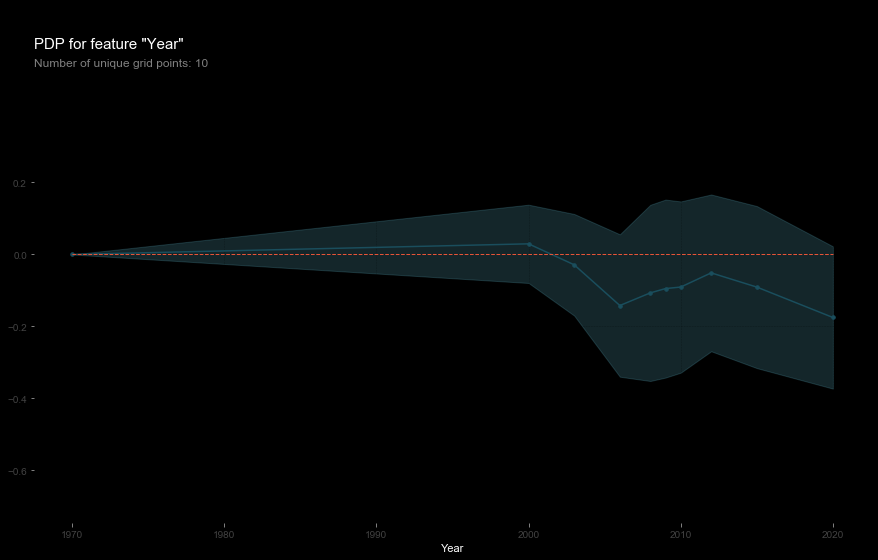

In [63]:
feature = 'Year'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

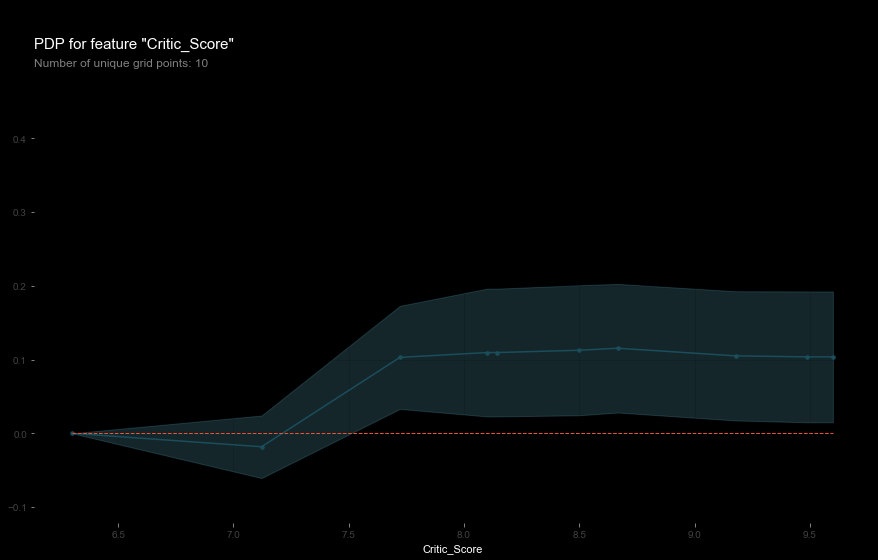

In [67]:
feature = 'Critic_Score'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val.dropna(),
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

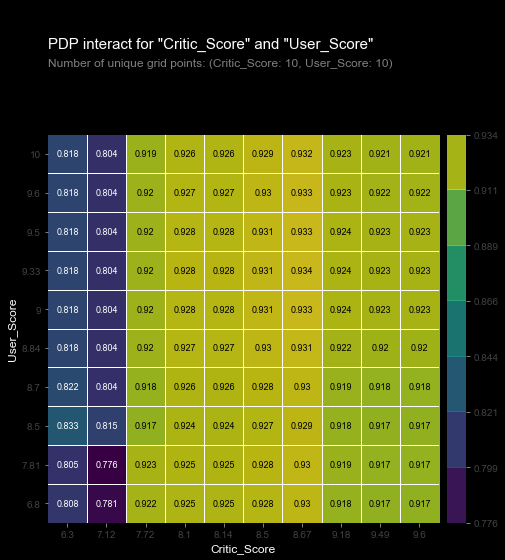

In [64]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Critic_Score', 'User_Score']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_val.dropna(), 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [43]:
X_val['Critic_Score'].describe()

count    1196.000000
mean        7.287542
std         1.448116
min         1.300000
25%         6.500000
50%         7.500000
75%         8.300000
max        10.000000
Name: Critic_Score, dtype: float64

In [45]:
X_val.dropna()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year
7745,Role-Playing,E,PS,Sony Computer Entertainment,Game Arts,8.4,9.0,1999.0
6,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0
4266,Adventure,T,DS,Nintendo,Cing,8.0,6.9,2007.0
8764,Action,E10,Wii,Namco Bandai,Bandai Namco Games,6.1,8.0,2009.0
1941,Role-Playing,E10,DS,Square Enix,Matrix Software,8.5,9.0,2008.0
16763,Strategy,E,PC,Strategy First,Ellipse Studios,6.1,9.0,2000.0
3699,Adventure,T,PS2,Capcom,Clover Studio,9.4,9.0,2006.0
136,Adventure,T,Wii,Nintendo,Nintendo EAD,9.5,9.6,2006.0
130,Shooter,M,X360,Activision,Treyarch,8.5,7.8,2008.0
324,Simulation,E,Wii,Nintendo,Nintendo EAD,7.1,8.8,2008.0
